In [189]:
using Plots
using LinearAlgebra
using LaTeXStrings
using StatsBase
using CSV
using DataFrames

In [190]:
t_start = time();

In [191]:
## done: mu = 0
#todo: mu = 1.2 done
# todo Delta = 2.5, mu =0
# todo Delta = 2.5, mu =1.2 done

## Parameters:

In [192]:
mu=0.0;
t = 1;
t0 = 1;
m_0 = -0.2;
Delta = 2.5;

x_periodic = 0;
y_periodic = 0;

L = 60;

Lx = L;
Ly = L;

exportdata=1;

In [193]:

sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];
gamma_01 = kron(eye2, sigma_x);
gamma_02 = kron(eye2, sigma_y);
gamma_03 = kron(eye2, sigma_z);
gamma_13 = kron(sigma_x,sigma_z);
gamma_30 = kron(sigma_z, eye2);
# gamma_31 = kron(sigma_z, sigma_x);
# gamma_32 = kron(sigma_z, sigma_y);
# gamma_33 = kron(sigma_z, sigma_z);
gamma_12 = kron(sigma_x, sigma_y);
gamma_23 = kron(sigma_y, sigma_z)

4×4 Matrix{Complex{Int64}}:
 0+0im  0+0im  0-1im  0+0im
 0+0im  0+0im  0+0im  0+1im
 0+1im  0+0im  0+0im  0+0im
 0+0im  0-1im  0+0im  0+0im

Equation of two lines are $y = mx + c_1$ and $y = mx + c_2$

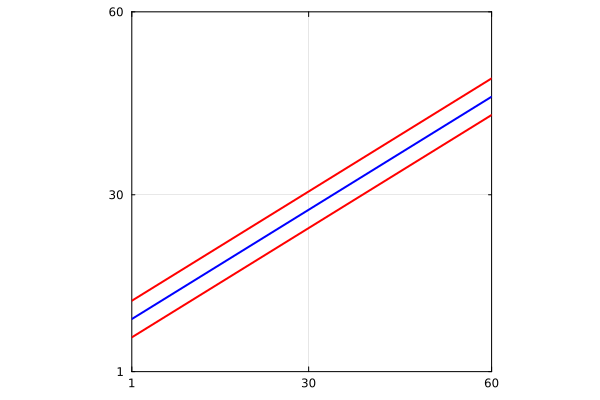

In [194]:
m = (-1+sqrt(5))/2;
# m=2/3
c1 = 6
c2 = 12

function line_down(x::Float64)
    return c1 + m*x
end

function line_up(x::Float64)
    return c2 + m*x
end

function line_middle(x::Float64)
    return (line_up(x) + line_down(x))/2
end

line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plot(line_x,line_down_y,color="red",width=2, xlims=(1,Lx),ylims=(1,Ly),legend=:none,aspect_ratio=:equal,frame=:box, framestyle=:thick,xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly])
plot!(line_x,line_up_y,color="red",width=2)
plot!(line_x,line_middle.(line_x),color="blue",width=2)

In [195]:
points_x_array = range(1, L,L)
points_y_array = range(1, L,L)

points2 = zeros(2*L^2)
for ii = 1:L
    for jj = 1:L
        points2[2*((jj-1)*L+ii)-1] = points_x_array[ii]
        points2[2*((jj-1)*L+ii)] = points_y_array[jj]
    end
end


### These arrays have N^2 elements, and hold the x and y coordinates of nth site
points_x_array = points2[1:2:end]
points_y_array =  points2[2:2:end]

site_index = range(1,L^2, L^2)

1.0:1.0:3600.0

### Now we isolate the PTB points

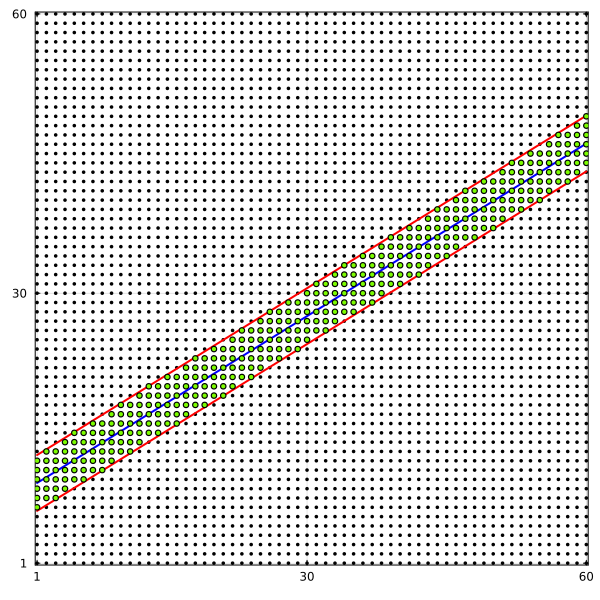

In [196]:
### PTB_index will contain ordered indices of the sites in PTB

PTB_index_dummy = collect(range(1,L^2,L^2))
for ii = 1:L^2
    if (points_y_array[ii] >= line_down(points_x_array[ii])) && (points_y_array[ii] <= line_up(points_x_array[ii]))
        ## Do nothing
    else
        PTB_index_dummy[ii] = 0.0
    end
end

## Here we store non-zero indices
PTB_index = findall(!iszero, PTB_index_dummy)

N_PTB = size(PTB_index)[1]

points_PTB_array_x = zeros(N_PTB)
points_PTB_array_y = zeros(N_PTB)

for ii = 1:N_PTB
    points_PTB_array_x[ii] = points_x_array[PTB_index[ii]]
    points_PTB_array_y[ii] = points_y_array[PTB_index[ii]]
end

### Draw lines separating PTB
line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plt_lattice=scatter(points_x_array, points_y_array,aspect_ratio=1,legend=false, 
                    xlims=[0.8,L+0.2], ylims=[0.8,L+0.2],color="black",markersize=2, frame=:box, framestyle=:thick, xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly], size=(600,600))
plt_lattice=plot!(line_x,line_down_y,color="red",width=2)
plt_lattice=plot!(line_x,line_up_y,color="red",width=2)
plt_lattice=plot!(line_x,line_middle.(line_x),color="blue",width=2)
plt_lattice=scatter!(points_PTB_array_x, points_PTB_array_y,color="lawngreen",aspect_ratio=1,legend=false,markersize=3)

## Percentage of sites in PTB

In [197]:
println("Number of sites in PTB = ",N_PTB)
println("Amount of sites in PTB = ",100* N_PTB/L^2, " %")

Number of sites in PTB = 360
Amount of sites in PTB = 10.0 %


In [198]:
println(PTB_index)

[361, 421, 422, 423, 481, 482, 483, 484, 541, 542, 543, 544, 545, 546, 601, 602, 603, 604, 605, 606, 607, 608, 661, 662, 663, 664, 665, 666, 667, 668, 669, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 784, 785, 786, 787, 788, 789, 790, 791, 792, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 969, 970, 971, 972, 973, 974, 975, 976, 977, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1646, 1647, 1648, 1649

## Coordinates of projected sites

### Equation of line_down is $y=mx + c_1$
### Equation of projector line is, $y-y_1 = (-1/m).(x-x_1)$, where $(x_1,y_1)$ is the coordinate of the site
### The two lines intersect at $((m.y_1 + x_1 - m.c_1)/(m^2 + 1), (m^2.y_1 + m.x_1 + c_1)/(m^2 + 1))$

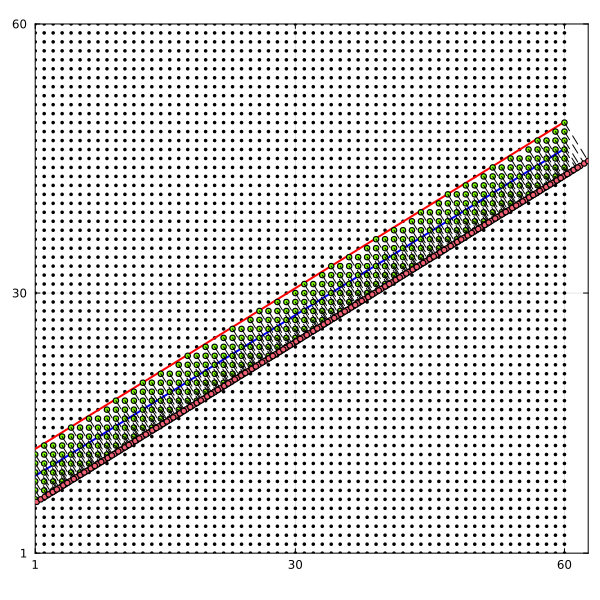

In [199]:
projected_points_PTB_array_x = (m*points_PTB_array_y + points_PTB_array_x - m*ones(N_PTB)*c1)/(m^2 + 1);
projected_points_PTB_array_y = m*projected_points_PTB_array_x + c1 * ones(N_PTB);

## This array contains distance along the line
## This should be x coordinates on the line * sec(theta), where the slope is tan(theta) = m
distance_along_projected_line = projected_points_PTB_array_x * sqrt(m^2 +1)

for ii = 1:N_PTB
    line_projected_x = [points_PTB_array_x[ii],projected_points_PTB_array_x[ii]]
    line_projected_y = [points_PTB_array_y[ii],projected_points_PTB_array_y[ii]]
    plt_lattice=plot!(line_projected_x,line_projected_y,linestyle=:dash, color="black")
end
plt_lattice=scatter!(projected_points_PTB_array_x,projected_points_PTB_array_y, 
            xlims=(1,maximum(vcat(projected_points_PTB_array_x,Lx))), ylims=(1,maximum(vcat(projected_points_PTB_array_y,Ly))), markersize=3)
display(plt_lattice)

## Generate Parent Hamiltonian

In [200]:
include("generate_matrices2D.jl")
include("angmom.jl")

generate_spin_matrices (generic function with 1 method)

In [201]:
println("t = ",t)
println("t0 = ", t0)
println("m_0 = ", m_0)
println("Delta = ", Delta)


println("Lx = ", Lx)
println("Ly = ", Ly)

t = 1
t0 = 1
m_0 = -0.2
Delta = 2.5
Lx = 60
Ly = 60


In [202]:
if(x_periodic^2 != x_periodic || y_periodic^2 != y_periodic)
    println("x_periodic and y_periodic must be 0 or 1")
    println("You entered x_periodic = ", x_periodic, " y_periodic = ", y_periodic)
    return
end

In [203]:

const_2D, CX2D, SX2D, CY2D, SY2D, CXCY2D, SXCY2D, CXSY2D = generate_matrices_2D(Lx,Ly,x_periodic,y_periodic)

h_SSH = t*kron(SX2D,gamma_01) + 0*kron(SY2D,gamma_02) + kron(m_0*const_2D- t0*(CX2D + const_2D),gamma_03) + Delta*kron(const_2D,gamma_13) -mu*kron(const_2D,gamma_30)

if(Hermitian_Check(h_SSH) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

Verified: Building Block Matrices are Hermitian


### The following (commented out to save execution time) is the code for local Chern marker in the parent lattice

In [204]:
# XList_parent = kron(range(1,1,Ly),range(1,Lx,Lx))
# YList_parent = kron(range(1,Ly,Ly),range(1,1,Lx))


# X1_parent = kron(diagm(XList_parent),kron(eye2,eye2))
# Y1_parent = kron(diagm(YList_parent),kron(eye2,eye2))

# energy_eigenvalues_parent, eigenstates_parent = eigen(h_SSH);
# filled_eigenstates_parent = eigenstates_parent[:,1:2*Lx*Ly]

# # ## We create a projector P, which projects to the space of filled eigenstates (half-filled)
# P_parent = conj(filled_eigenstates_parent) * transpose(filled_eigenstates_parent)
# # ## Q projects to the empty eigenstates
# Q_parent = kron(const_2D,kron(eye2,eye2)) - P_parent

# W_parent = kron(const_2D,gamma_12);

# # ## We define the local Chern operators, whose diagonal elements in the Wannier basis are the local Chern numbers per orbital
# PolMatrix_parent = W_parent*(Q_parent*X1_parent*P_parent + P_parent*X1_parent*Q_parent);

# PolMatrixSiteWiseList_parent = zeros(Lx*Ly)*im;

# # ## Here we add the two chern numbers for the two orbitals
# for ii = 1:Lx*Ly
#     PolMatrixSiteWiseList_parent[ii] = PolMatrix_parent[4*(ii-1) + 1,4*(ii-1) + 1] + PolMatrix_parent[4*(ii-1) + 2,4*(ii-1) + 2] + PolMatrix_parent[4*(ii-1) + 3,4*(ii-1) + 3] + PolMatrix_parent[4*(ii-1) + 4,4*(ii-1) + 4]
# end

# PolMatrixSiteWiseList_parent = real(PolMatrixSiteWiseList_parent)
# println(PolMatrixSiteWiseList_parent)

In [205]:
# plt1 = scatter(1:Lx*Ly, PolMatrixSiteWiseList_parent,ylims=(-2,2))
# display(plt1)

### I plot the local topological marker at the middle line $y = L_y/2$ of the lattice

In [206]:
# ### We will plot the local Chern marker along the line y = Ly/2
# plt_Chern_parent = scatter(1:Lx, PolMatrixSiteWiseList_parent[(Int(round(Ly/2)) - 1)*Lx+1:(Int(round(Ly/2)) - 1)*Lx+Lx], ylims=(-3,3), 
#                 xlabel="x", ylabel="Perent lattice Local Chern marker at y=L/2", legend=:none,
#                 title=string("Lx = ", string(Lx), ", t = ", string(t), ", t0 = ", string(t0), ", m_0 = ", string(m_0), ", Delta = ", string(Delta)))
# display(plt_Chern_parent)

## Clear variables

In [207]:
const_2D= Nothing
CX2D= Nothing
SX2D= Nothing
CY2D= Nothing
SY2D= Nothing
CXCY2D= Nothing
SXCY2D= Nothing
CXSY2D= Nothing

Nothing

## Now generate PTB Hamiltonian

In [208]:
PTB_orbital_index = ones(4*N_PTB);
for ii = 1:N_PTB
    PTB_orbital_index[4*ii-3] = 4*PTB_index[ii]-3
    PTB_orbital_index[4*ii-2] = 4*PTB_index[ii]-2
    PTB_orbital_index[4*ii-1] = 4*PTB_index[ii]-1
    PTB_orbital_index[4*ii] = 4*PTB_index[ii]
end
println(PTB_orbital_index)

[1441.0, 1442.0, 1443.0, 1444.0, 1681.0, 1682.0, 1683.0, 1684.0, 1685.0, 1686.0, 1687.0, 1688.0, 1689.0, 1690.0, 1691.0, 1692.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 2161.0, 2162.0, 2163.0, 2164.0, 2165.0, 2166.0, 2167.0, 2168.0, 2169.0, 2170.0, 2171.0, 2172.0, 2173.0, 2174.0, 2175.0, 2176.0, 2177.0, 2178.0, 2179.0, 2180.0, 2181.0, 2182.0, 2183.0, 2184.0, 2401.0, 2402.0, 2403.0, 2404.0, 2405.0, 2406.0, 2407.0, 2408.0, 2409.0, 2410.0, 2411.0, 2412.0, 2413.0, 2414.0, 2415.0, 2416.0, 2417.0, 2418.0, 2419.0, 2420.0, 2421.0, 2422.0, 2423.0, 2424.0, 2425.0, 2426.0, 2427.0, 2428.0, 2429.0, 2430.0, 2431.0, 2432.0, 2641.0, 2642.0, 2643.0, 2644.0, 2645.0, 2646.0, 2647.0, 2648.0, 2649.0, 2650.0, 2651.0, 2652.0, 2653.0, 2654.0, 2655.0, 2656.0, 2657.0, 2658.0, 2659.0, 2660.0, 2661.0, 2662.0, 2663.0, 2664.0, 2665.0, 2666.0, 2667.0, 2668.0, 2669.0, 2670.0, 2671.0, 2672.0, 2673.0, 2674.0, 2675.0, 2676.0, 2885.0,

In [209]:
outside_orbital_index = setdiff(1:4*Lx*Ly,PTB_orbital_index);
println(outside_orbital_index)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 1

Excessive output truncated after 524290 bytes.

3616.0, 3617.0, 3618.0, 3619.0, 3620.0, 3621.0, 3622.0, 3623.0, 3624.0, 3665.0, 3666.0, 3667.0, 3668.0, 3669.0, 3670.0, 3671.0, 3672.0, 3673.0, 3674.0, 3675.0, 3676.0, 3677.0, 3678.0, 3679.0, 3680.0, 3681.0, 3682.0, 3683.0, 3684.0, 3685.0, 3686.0, 3687.0, 3688.0, 3689.0, 3690.0, 3691.0, 3692.0, 3693.0, 3694.0, 3695.0, 3696.0, 3697.0, 3698.0, 3699.0, 3700.0, 3701.0, 3702.0, 3703.0, 3704.0, 3705.0, 3706.0, 3707.0, 3708.0, 3709.0, 3710.0, 3711.0, 3712.0, 3713.0, 3714.0, 3715.0, 3716.0, 3717.0, 3718.0, 3719.0, 3720.0, 3721.0, 3722.0, 3723.0, 3724.0, 3725.0, 3726.0, 3727.0, 3728.0, 3729.0, 3730.0, 3731.0, 3732.0, 3733.0, 3734.0, 3735.0, 

In [210]:
NOrbitalsOutside = 4*Lx*Ly - 4*N_PTB

12960

In [211]:
NOrbitalsInside = 4*N_PTB

1440

In [212]:
H_PTB_renor = zeros(ComplexF64, NOrbitalsInside, NOrbitalsInside);

H_11 = zeros(ComplexF64, NOrbitalsInside, NOrbitalsInside);

H_22 = zeros(ComplexF64, NOrbitalsOutside, NOrbitalsOutside);

H_21 = zeros(ComplexF64, NOrbitalsOutside, NOrbitalsInside);

H_12 = zeros(ComplexF64, NOrbitalsInside, NOrbitalsOutside);

println("Matrix dimensions:")
println("H_11: $(size(H_11))")
println("H_22: $(size(H_22))")
println("H_21: $(size(H_21))")
println("H_12: $(size(H_12))")
println("Total memory for matrices: ~$(round((NOrbitalsInside^2 + NOrbitalsOutside^2 + 2*NOrbitalsInside*NOrbitalsOutside)*16/1024^2, digits=1)) MB")

In [213]:
for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsInside
        H_11[ii,jj] = h_SSH[Int(PTB_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

In [214]:
# Threads.@threads for ii = 1:NOrbitalsOutside
#     for jj = 1:NOrbitalsOutside
#         H_22[ii,jj] = h_SSH[Int(outside_orbital_index[ii]), Int(outside_orbital_index[jj])]
#     end
# end

In [215]:
# Threads.@threads for ii = 1:NOrbitalsInside
#     for jj = 1:NOrbitalsOutside
#         H_12[ii,jj] = h_SSH[Int(PTB_orbital_index[ii]), Int(outside_orbital_index[jj])]
#     end
# end

In [216]:
# Threads.@threads for ii = 1:NOrbitalsOutside
#     for jj = 1:NOrbitalsInside
#         H_21[ii,jj] = h_SSH[Int(outside_orbital_index[ii]), Int(PTB_orbital_index[jj])]
#     end
# end

## Clear variables

In [217]:
h_SSH= Nothing

Nothing

## Add a small constant matrix to invert matrix H_22 in case its eigenvalue is 0

In [218]:
H_PTB_renor = H_11 #- Hermitian(H_12*inv(Hermitian(H_22 + 10^(-8)*Matrix(1.0I, NOrbitalsOutside, NOrbitalsOutside)))*H_21);

1440×1440 Matrix{ComplexF64}:
 -1.2+0.0im   0.0+0.0im   2.5+0.0im  …   0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   1.2+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  2.5+0.0im   0.0+0.0im  -1.2+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im  -2.5+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im  …   0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
     ⋮                               ⋱                          
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0

In [219]:
H_11= Nothing
H_12= Nothing
H_21= Nothing
H_22= Nothing

Nothing

In [220]:
if(Hermitian_Check(H_PTB_renor) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

### Calculation of local Chern Marker

In [221]:
## Store the x and y coordinates of the sites in PTB
YList_PTB = ceil.(PTB_index/Lx);
XList_PTB = PTB_index - (YList_PTB - ones(N_PTB))*Lx;

In [222]:
## Kronecker product to get the orbitals
XListKron_PTB = kron(XList_PTB,[1,1,1,1]);
YListKron_PTB = kron(YList_PTB,[1,1,1,1]);

X1_PTB = diagm(XListKron_PTB);
Y1_PTB = diagm(YListKron_PTB);

In [223]:
(energy_eigenvalues_PTB, eigenstates_PTB) = eigen(H_PTB_renor);
#println(size(eigenstates))
filled_eigenstates_PTB = eigenstates_PTB[:,1:2*N_PTB]

## We create a projector P, which projects to the space of filled eigenstates (half-filled)
P_PTB = conj(filled_eigenstates_PTB) * transpose(filled_eigenstates_PTB)
## Q projects to the empty eigenstates
Q_PTB = kron(diagm(ones(N_PTB)),kron(eye2,eye2)) - P_PTB
W_PTB = kron(diagm(ones(N_PTB)),gamma_12)
## We define the local Chern operators, whose diagonal elements in the Wannier basis are the local Chern numbers per orbital
local_pol_PTB = W_PTB*(Q_PTB*X1_PTB*P_PTB + P_PTB*X1_PTB*Q_PTB);

local_pol_PTBSiteWiseList_PTB = zeros(N_PTB)*im;

## Here we add the two chern numbers for the two orbitals
for ii = 1:N_PTB
    local_pol_PTBSiteWiseList_PTB[ii] = local_pol_PTB[4*ii - 3,4*ii - 3] + local_pol_PTB[4*ii - 2,4*ii - 2] + local_pol_PTB[4*ii - 1,4*ii - 1] + local_pol_PTB[4*ii,4*ii]
end
local_pol_PTBSiteWiseList_PTB = real(local_pol_PTBSiteWiseList_PTB)

360-element Vector{Float64}:
  0.0
  0.016969876302402535
 -0.033939752604804294
  0.016969876302402015
  0.027715561561415587
 -0.02771556156141617
 -0.027715561561412916
  0.027715561561413873
  0.037500924203238924
 -0.01661192460617663
  ⋮
 -0.021089712127609454
  0.03393640053614417
  0.027715561561573142
 -0.027715561561579224
 -0.027715561561593327
  0.027715561561598805
 -1.4805766502798428e-15
  1.4559003727749644e-15
  0.0

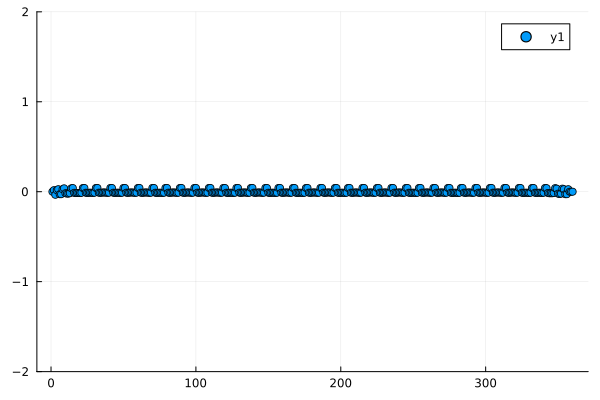

In [224]:
plt2 = scatter(1:N_PTB, local_pol_PTBSiteWiseList_PTB,ylims=(-2,2))
display(plt2)

In [225]:
Gap_PTB = 2*minimum(abs.(energy_eigenvalues_PTB))

0.7963712807619707

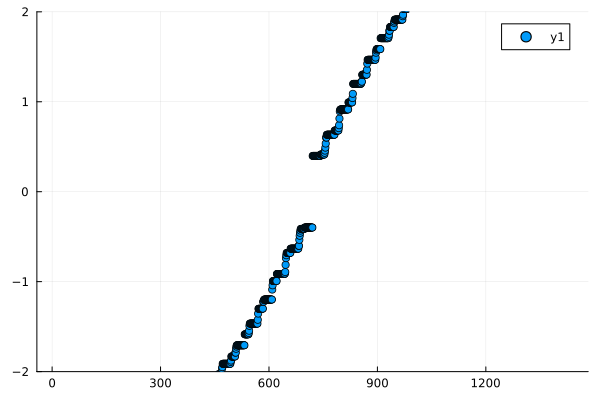

In [226]:
plt2 = scatter(1:NOrbitalsInside, energy_eigenvalues_PTB, ylims=(-2,2))
display(plt2)

In [227]:
function state_to_real_space_LDoS(v::Array{ComplexF64})
    n_sites = Int(size(v)[1]/4)
    prob_dist = zeros(n_sites)
    for ii = 1:n_sites
        prob_dist[ii] = abs(v[4*ii-3])^2 + abs(v[4*ii-2])^2 +  abs(v[4*ii-1])^2 +  abs(v[4*ii])^2
    end
    return prob_dist
end 

state_to_real_space_LDoS (generic function with 1 method)

## Plot of LDoS of topological states of PTB

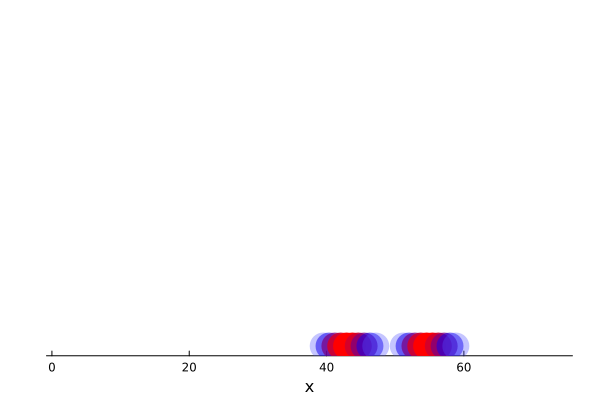

In [228]:
#boundary_state_nearest_zero = eigenstates_PTB[:,N_PTB];
probability_boundary_state = state_to_real_space_LDoS(eigenstates_PTB[:,2*N_PTB]) + state_to_real_space_LDoS(eigenstates_PTB[:,2*N_PTB+1]);

color_map = cgrad([RGB(1,1,1), RGB(0,0,1), RGB(1,0,0)])

# Calculate alphas based on y values
function alpha_function(p, pmax)
    if p < pmax/10
        return 0
    else
        return p/pmax
    end
end
alphas = alpha_function.(probability_boundary_state, maximum(probability_boundary_state))

#plt_PTB_BD_states = scatter(distance_along_projected_line, probability_boundary_state)
plt_PTB_BD_states = scatter(distance_along_projected_line, ones(N_PTB), 
                            zcolor=probability_boundary_state, legend=false, xlabel="x", colorbar_title="Value",
                            c=color_map, ms=15, seriesalpha=alphas, markerstrokewidth=0, grid=false,
                            yaxis=false)

display(plt_PTB_BD_states)

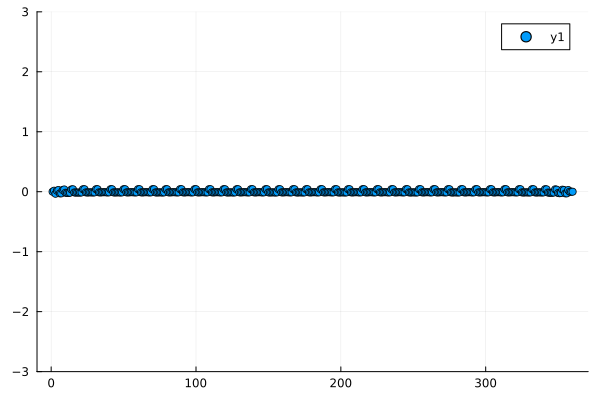

In [229]:
plt_PTB_local_marker_sitewise = scatter(1:N_PTB, local_pol_PTBSiteWiseList_PTB,ylims=(-3,3),yticks=range(-3,3,7))

### Now I isolate sites on the middle line, and plot their local Chern markers

### For each value of x, I find the site on the PTB closest to the middle line

#### Note that this works only if PTB is thick enough to have more than Lx points

In [230]:
### I generate an array which are the points closest to the middle line
middle_line_x_coordinates = 1:Lx;
middle_line_y_coordinates = round.(line_middle.(float(middle_line_x_coordinates)));

In [231]:
Indices_of_PTB_middle_points = zeros(Lx);
local_marker_PTB_list_middle_points = zeros(Lx);

for ii = 1:Lx
    for jj = 1:N_PTB
        if (XList_PTB[jj] == middle_line_x_coordinates[ii]) && (YList_PTB[jj] == middle_line_y_coordinates[ii])
            Indices_of_PTB_middle_points[ii] = PTB_index[jj];
            local_marker_PTB_list_middle_points[ii] = local_pol_PTBSiteWiseList_PTB[jj];
        end
    end
end


In [232]:
mode_chern = modes(round.(local_marker_PTB_list_middle_points))[1]

-0.0

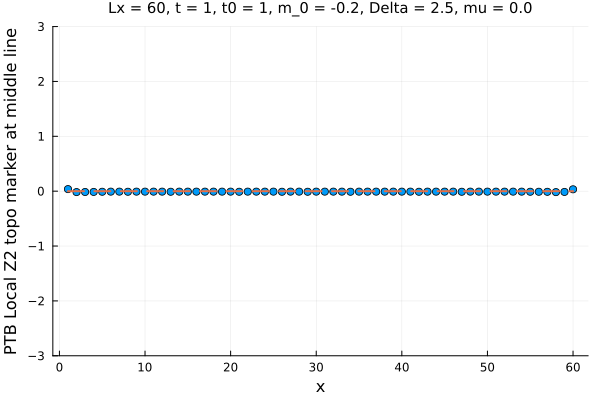

In [233]:
### We will plot the local Chern marker along the line y = Ly/2
plt_local_PTB = scatter(1:Lx, local_marker_PTB_list_middle_points, ylims=(-3,3), legend=:none,
                xlabel="x", ylabel="PTB Local Z2 topo marker at middle line", 
                title=string("Lx = ", string(Lx), ", t = ", string(t), ", t0 = ", string(t0), ", m_0 = ", string(m_0), ", Delta = ", string(Delta), ", mu = ", string(mu)),titlefontsize=10)
plt_local_PTB = plot!(1:Lx, mode_chern*ones(Lx), linestyle=:dash, thickness=2, linewidth=2)
display(plt_local_PTB)

In [234]:
# Define the folder path (relative or absolute)
folder_path = "data/topo_super/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "H11_only_t0=$(t0)_t=$(t)_m_0=$(m_0)_mu=$(mu)_Delta=$(Delta)_x_periodic=$(x_periodic)_y_periodic=$(y_periodic)_L=$(L)_m=$(m)_c1=$(c1)_c2=$(c2).csv"

isdir(string(folder_path,"weak_invariant/")) || mkdir(string(folder_path,"weak_invariant/"))

if exportdata==1
    CSV.write(string(folder_path,"weak_invariant/",filename), (; local_marker_PTB_list_middle_points),writeheader=false)
end

"data/topo_super/weak_invariant/H11_only_t0=1_t=1_m_0=-0.2_mu=0.0_Delta=2.5_x_periodic=0_y_periodic=0_L=60_m=0.6180339887498949_c1=6_c2=12.csv"

In [235]:
t_end=time();
println("time taken = ", t_end - t_start," seconds")